In [1]:
# P. Barry Seavey
# PRED 454-55, Winter 2018
# project 2
# kaggle.com 'Facial Keypoints Detection'

In [2]:
# --- null imputation attempt ---

In [3]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
from sklearn.utils import shuffle

In [5]:
import os
print(os.listdir('../Facial Keypoints'))

['.ipynb_checkpoints', '15_pt_1.PNG', '4 Traditional White with Purple.pptx', '4_pt_1.PNG', 'clean-white-brick-wall-textures-plain-820x532.jpg', 'CNN2_128-500-500-30_augmentdata.h5', 'CNN2_128-500-500-30_dropout.h5', 'CNN2_128-500-500-30_v1.h5', 'CNN2_128-500-500-30_v5.h5', 'CNN_500-90-30_v2.h5', 'CNN_500-90-30_v5.h5', 'df_dump.PNG', 'face_model.h5', 'Fac_Kpt_1stCNNModel.ipynb', 'Fac_Kpt_1stModel.ipynb', 'Fac_Kpt_CNN-m2-flipnonull.ipynb', 'Fac_Kpt_CNN-model2-augmentdata.ipynb', 'Fac_Kpt_CNN-num2-dropout.ipynb', 'Fac_Kpt_CNN-num2.ipynb', 'Fac_Kpt_EDA1.ipynb', 'Fac_Kpt_img-extraction.ipynb', 'Fac_Kpt_nullpredict.ipynb', 'FKPt - imputedata1.ipynb', 'FKPt_CNN-batchnorm.ipynb', 'FKPt_CNN-m2-ensemble_augdata.ipynb', 'IdLookupTable.csv', 'imgs', 'KPT_500-90-30.h5', 'model2_augmentdata-v2.csv', 'model2_augmentdata.csv', 'model2_flipnonull.csv', 'model2_v1.csv', 'model2_withdrop.csv', 'nigel.jpg', 'pic1.png', 'SampleSubmission.csv', 'Screen_Caps', 'Seavey_base_500-90-30_v2.csv', 'Seavey_base_50

In [6]:
#

In [7]:
df = pd.read_csv('../Facial Keypoints/training.csv')
    
#df['Image'] = df['Image'].apply(lambda im: np.fromstring(im, sep=' '))

In [8]:
df.head(2)

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...


In [54]:
df['Image'] = df['Image'].apply(lambda im: np.fromstring(im, sep=' '))

In [55]:
df.head(2)

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,"[238.0, 236.0, 237.0, 238.0, 240.0, 240.0, 239..."
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,"[219.0, 215.0, 204.0, 196.0, 204.0, 211.0, 212..."


In [10]:
df_null=df[df.isnull().any(axis=1)]

In [11]:
df_null.head(2)

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
210,65.365120,39.988480,28.251520,37.399680,59.322880,40.851840,71.98208,41.715200,33.717760,38.550400,...,61.278720,57.884800,87.459200,34.293120,85.15776,46.376960,79.116160,NaN,NaN,181 56 47 59 65 71 86 66 32 22 17 7 8 12 13 14...
350,67.258311,37.229867,26.980267,36.270862,60.225422,37.549511,74.29120,37.549511,34.333156,36.590507,...,62.163911,57.028978,86.778311,36.251022,87.09760,45.201778,79.106133,NaN,NaN,59 41 36 32 32 31 33 41 55 72 79 70 64 50 52 6...


In [77]:
(df_null.isnull().sum(axis=1))

210      2
350      2
499      2
512      2
810      2
839      2
895      2
1058     2
1194     2
1230     2
1245     2
1546     2
1548     2
1585     2
1588     2
1598     2
1601     2
1605     2
1620    10
1624     2
1626     2
1627     2
1629     2
1636     8
1643     6
1646     6
1647     2
1652     4
1654     2
1678     2
        ..
7019    22
7020    22
7021    22
7022    22
7023    22
7024    22
7025    22
7026    22
7027    22
7028    22
7029    22
7030    22
7031    22
7032    22
7033    22
7034    22
7035    22
7036    22
7037    22
7038    22
7039    22
7040    22
7041    22
7042    22
7043    22
7044    22
7045    22
7046    22
7047    22
7048    22
Length: 4909, dtype: int64

In [12]:
df_4pt=df_null[df_null.isnull().sum(axis=1)>21]

In [13]:
df_4pt.head(2)

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
2284,48.865297,43.918417,23.928389,40.959788,NaN,NaN,NaN,NaN,NaN,NaN,...,66.108117,NaN,NaN,NaN,NaN,NaN,NaN,30.479611,75.195334,0 11 10 0 2 12 9 10 27 6 3 3 2 3 2 2 3 3 3 3 5...
2285,66.534784,38.207872,30.261888,38.207872,NaN,NaN,NaN,NaN,NaN,NaN,...,65.844480,NaN,NaN,NaN,NaN,NaN,NaN,46.239232,80.526336,95 95 95 94 89 62 35 18 17 30 34 36 38 39 37 3...


In [66]:
X = np.vstack(df_4pt['Image'].values)/255.
X = X.astype(np.float32)
    
y = df_4pt[df_4pt.columns[:-1]].values
y = (y-48)/48
y = y.astype(np.float32)

In [67]:
def plt_sample(num):
    img = X[num].reshape(96, 96)
    #
    plt.imshow(img, cmap='gray')
    plt.scatter(y[num][0::2] * 48 + 48, y[num][1::2] * 48 + 48, marker='x', s=10, color='red')
    plt.title("Image=%d" %(num))

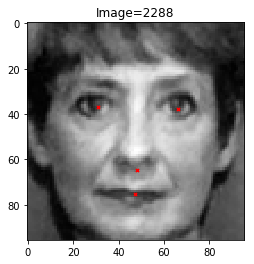

In [68]:
plt_sample(2288)

In [14]:
df_4pt['nose_tip_y'] -=5.

C:\Users\Barry\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [15]:
df_4pt['mouth_center_bottom_lip_y'] +=5.

C:\Users\Barry\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [24]:
df_4pt.head(3)

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
2284,48.865297,43.918417,23.928389,40.959788,NaN,NaN,NaN,NaN,NaN,NaN,...,61.108117,NaN,NaN,NaN,NaN,NaN,NaN,30.479611,80.195334,0 11 10 0 2 12 9 10 27 6 3 3 2 3 2 2 3 3 3 3 5...
2285,66.534784,38.207872,30.261888,38.207872,NaN,NaN,NaN,NaN,NaN,NaN,...,60.844480,NaN,NaN,NaN,NaN,NaN,NaN,46.239232,85.526336,95 95 95 94 89 62 35 18 17 30 34 36 38 39 37 3...
2286,66.125628,36.616188,31.262632,40.600519,NaN,NaN,NaN,NaN,NaN,NaN,...,58.178428,NaN,NaN,NaN,NaN,NaN,NaN,51.848441,81.791559,4 6 9 8 7 5 5 5 11 18 30 45 61 72 90 123 132 1...


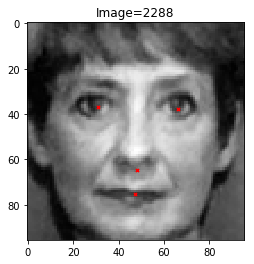

In [40]:
plt_sample(2288)

In [82]:
type(df_4pt.Image)

pandas.core.series.Series

In [23]:
df[2284:2287]

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
2284,48.865297,43.918417,23.928389,40.959788,NaN,NaN,NaN,NaN,NaN,NaN,...,66.108117,NaN,NaN,NaN,NaN,NaN,NaN,30.479611,75.195334,0 11 10 0 2 12 9 10 27 6 3 3 2 3 2 2 3 3 3 3 5...
2285,66.534784,38.207872,30.261888,38.207872,NaN,NaN,NaN,NaN,NaN,NaN,...,65.844480,NaN,NaN,NaN,NaN,NaN,NaN,46.239232,80.526336,95 95 95 94 89 62 35 18 17 30 34 36 38 39 37 3...
2286,66.125628,36.616188,31.262632,40.600519,NaN,NaN,NaN,NaN,NaN,NaN,...,63.178428,NaN,NaN,NaN,NaN,NaN,NaN,51.848441,76.791559,4 6 9 8 7 5 5 5 11 18 30 45 61 72 90 123 132 1...


In [20]:
df_4pt.index

Int64Index([2284, 2285, 2286, 2287, 2288, 2289, 2290, 2291, 2292, 2293,
            ...
            7039, 7040, 7041, 7042, 7043, 7044, 7045, 7046, 7047, 7048],
           dtype='int64', length=4765)

In [27]:
df=pd.concat([df[~df.index.isin(df_4pt.index)], df_4pt])

In [28]:
df[2284:2287]

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
2284,48.865297,43.918417,23.928389,40.959788,NaN,NaN,NaN,NaN,NaN,NaN,...,61.108117,NaN,NaN,NaN,NaN,NaN,NaN,30.479611,80.195334,0 11 10 0 2 12 9 10 27 6 3 3 2 3 2 2 3 3 3 3 5...
2285,66.534784,38.207872,30.261888,38.207872,NaN,NaN,NaN,NaN,NaN,NaN,...,60.844480,NaN,NaN,NaN,NaN,NaN,NaN,46.239232,85.526336,95 95 95 94 89 62 35 18 17 30 34 36 38 39 37 3...
2286,66.125628,36.616188,31.262632,40.600519,NaN,NaN,NaN,NaN,NaN,NaN,...,58.178428,NaN,NaN,NaN,NaN,NaN,NaN,51.848441,81.791559,4 6 9 8 7 5 5 5 11 18 30 45 61 72 90 123 132 1...


In [29]:
df.to_csv('nulldata.csv')

In [30]:
df.shape

(7049, 31)

In [84]:
#df_4pt.to_csv('train_nulls.csv')

In [17]:
Xnull = np.vstack(df_null['Image'].values)#/255
Xnull = Xnull.astype(np.float32)

In [19]:
ynull = df_null[df_null.columns[:-1]].values
ynull = (ynull-48)/48
ynull = ynull.astype(np.float32)

In [20]:
len(Xnull)

4909

In [21]:
Xnull.shape

(4909, 9216)

In [22]:
ynull.shape

(4909, 30)

In [48]:
df = df.dropna()
columns = df.columns
    
X = np.vstack(df['Image'].values)#/255
X = X.astype(np.float32)
    
y = df[df.columns[:-1]].values
y = (y-48)/48
y = y.astype(np.float32)

In [50]:
X.shape

(2140, 9216)

In [51]:
df.shape

(2140, 31)

In [52]:
df_null.shape

(4909, 31)

In [57]:
df_null.head(3)

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
210,65.365120,39.988480,28.251520,37.399680,59.322880,40.851840,71.982080,41.715200,33.717760,38.550400,...,61.278720,57.884800,87.459200,34.293120,85.15776,46.376960,79.116160,NaN,NaN,"[181.0, 56.0, 47.0, 59.0, 65.0, 71.0, 86.0, 66..."
350,67.258311,37.229867,26.980267,36.270862,60.225422,37.549511,74.291200,37.549511,34.333156,36.590507,...,62.163911,57.028978,86.778311,36.251022,87.09760,45.201778,79.106133,NaN,NaN,"[59.0, 41.0, 36.0, 32.0, 32.0, 31.0, 33.0, 41...."
499,65.783008,41.160992,29.971041,37.969983,60.464132,41.160992,71.455736,42.224926,35.289917,39.388562,...,58.180760,56.918479,85.482843,28.197818,81.93719,45.926876,75.554380,NaN,NaN,"[118.0, 127.0, 122.0, 109.0, 129.0, 154.0, 158..."


In [54]:
df_null.index

Int64Index([ 210,  350,  499,  512,  810,  839,  895, 1058, 1194, 1230,
            ...
            7039, 7040, 7041, 7042, 7043, 7044, 7045, 7046, 7047, 7048],
           dtype='int64', length=4909)

In [14]:
def plt_sample(num):
    img = Xnull[num].reshape(96, 96)
    #
    plt.imshow(img, cmap='gray')
    #plt.scatter(ynull[num][0::2] * 48 + 48, ynull[num][1::2] * 48 + 48, marker='x', s=10, color='red')
    #plt.title("Image=%d" %(number))

In [87]:
number=(df_null.index==6493)

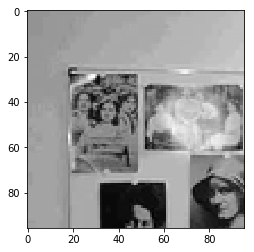

In [88]:
plt_sample(number)

In [7]:
def load(test=False, cols=None):
    
    fname = "test.csv" if test else "training.csv"
    df = pd.read_csv(fname)
    
    df['Image'] = df['Image'].apply(lambda im: np.fromstring(im, sep=' '))
    
    if cols:
        df = df[list(cols)+['Image']]
    
    #print( df.count())
    df = df.dropna()
    columns = df.columns
    
    X = np.vstack(df['Image'].values)#/255
    X = X.astype(np.float32)
    
    if not test:
        y = df[df.columns[:-1]].values
        #y = (y-48)/48
        X, y = shuffle(X, y, random_state=20)
        y = y.astype(np.float32)
    else:
        y = None
        columns = None
    
    return X, y, columns

def load2d(test=False, cols=None):
    
    X, y, columns = load(test, cols)
    X = X.reshape(-1,96,96, 1)
    
    return X, y, columns

In [8]:
X, y, columns = load2d(test=False)
columns = np.array(list(columns[:-1]))
columns

array(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y',
       'mouth_right_corner_x', 'mouth_right_corner_y',
       'mouth_center_top_lip_x', 'mouth_center_top_lip_y',
       'mouth_center_bottom_lip_x', 'mouth_center_bottom_lip_y'],
      dtype='<U25')

In [9]:
# test data
X_test, _, __ = load2d(test=True)
X_test.shape

(1783, 96, 96, 1)

In [12]:
model = Sequential()

model.add(BatchNormalization(input_shape=(96, 96, 1)))
model.add(Conv2D(24, 5, data_format="channels_last", kernel_initializer="he_normal", 
                 input_shape=(96, 96, 1), padding="same"))
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(36, 5))
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(48, 5))
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(64, 3))
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(500))
model.add(Activation("relu"))

model.add(Dense(90))
model.add(Activation("relu"))

model.add(Dense(30))
model.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_1 (Batch (None, 96, 96, 1)         4         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 96, 96, 24)        624       
_________________________________________________________________
activation_1 (Activation)    (None, 96, 96, 24)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 24)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 44, 44, 36)        21636     
_________________________________________________________________
activation_2 (Activation)    (None, 44, 44, 36)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 36)        0         
__________

In [13]:
# save best weights
checkpointer = ModelCheckpoint(filepath='face_model.h5', verbose=1, save_best_only=True)

# num epochs
epochs = 50

# run model
hist = model.fit(X, y, epochs=epochs, 
                 validation_split=0.2, callbacks=[checkpointer], verbose=2)

Train on 1712 samples, validate on 428 samples
Epoch 1/50
Epoch 00000: val_loss improved from inf to 261.88452, saving model to face_model.h5
30s - loss: 565.1212 - acc: 0.4994 - val_loss: 261.8845 - val_acc: 0.7103
Epoch 2/50
Epoch 00001: val_loss did not improve
29s - loss: 252.3224 - acc: 0.7044 - val_loss: 829.2970 - val_acc: 0.7079
Epoch 3/50
Epoch 00002: val_loss improved from 261.88452 to 137.35753, saving model to face_model.h5
29s - loss: 219.3484 - acc: 0.6992 - val_loss: 137.3575 - val_acc: 0.7079
Epoch 4/50
Epoch 00003: val_loss did not improve
29s - loss: 185.7434 - acc: 0.6822 - val_loss: 255.5158 - val_acc: 0.7079
Epoch 5/50
Epoch 00004: val_loss did not improve
28s - loss: 149.2122 - acc: 0.6560 - val_loss: 786.0732 - val_acc: 0.6308
Epoch 6/50
Epoch 00005: val_loss improved from 137.35753 to 112.55869, saving model to face_model.h5
29s - loss: 160.3597 - acc: 0.6875 - val_loss: 112.5587 - val_acc: 0.7079
Epoch 7/50
Epoch 00006: val_loss did not improve
28s - loss: 127.

In [14]:
# Make Predictions on test set using best model weights
model.load_weights("face_model.h5")
y_test = model.predict(X_test)
print(y_test.shape)

(1783, 30)


In [16]:
from keras import losses

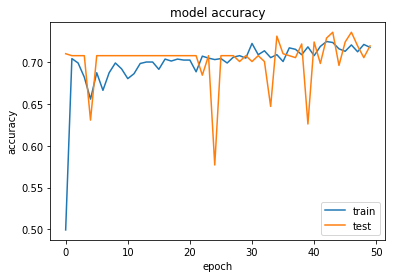

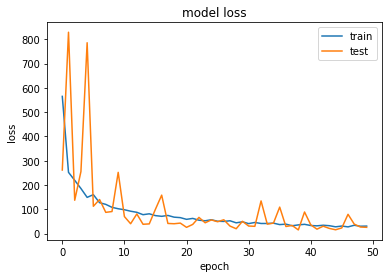

In [24]:
# summarize history for accuracy
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [10]:
def plt_sample(num):
    img = X[num].reshape(96, 96)
    #
    plt.imshow(img, cmap='gray')
    plt.scatter(y[num][0::2] * 48 + 48, y[num][1::2] * 48 + 48, marker='x', s=10, color='red')

In [67]:
X, y = load()  # loads train data only

left_eye_center_x            7039
left_eye_center_y            7039
right_eye_center_x           7036
right_eye_center_y           7036
left_eye_inner_corner_x      2271
left_eye_inner_corner_y      2271
left_eye_outer_corner_x      2267
left_eye_outer_corner_y      2267
right_eye_inner_corner_x     2268
right_eye_inner_corner_y     2268
right_eye_outer_corner_x     2268
right_eye_outer_corner_y     2268
left_eyebrow_inner_end_x     2270
left_eyebrow_inner_end_y     2270
left_eyebrow_outer_end_x     2225
left_eyebrow_outer_end_y     2225
right_eyebrow_inner_end_x    2270
right_eyebrow_inner_end_y    2270
right_eyebrow_outer_end_x    2236
right_eyebrow_outer_end_y    2236
nose_tip_x                   7049
nose_tip_y                   7049
mouth_left_corner_x          2269
mouth_left_corner_y          2269
mouth_right_corner_x         2270
mouth_right_corner_y         2270
mouth_center_top_lip_x       2275
mouth_center_top_lip_y       2275
mouth_center_bottom_lip_x    7016
mouth_center_b

In [68]:
X.shape

(2140, 9216)

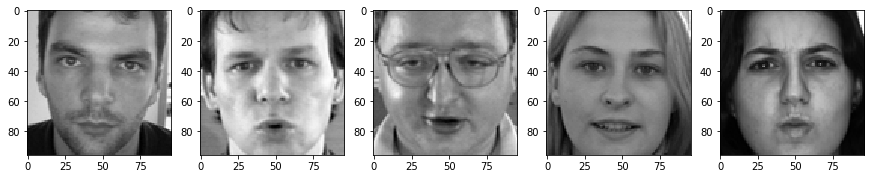

In [16]:
fig=plt.figure(figsize=(15, 15))
columns = 5
rows = 1
for i in range(1, columns*rows +1):
    img = X[i].reshape(96, 96)
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap='gray')
plt.show()

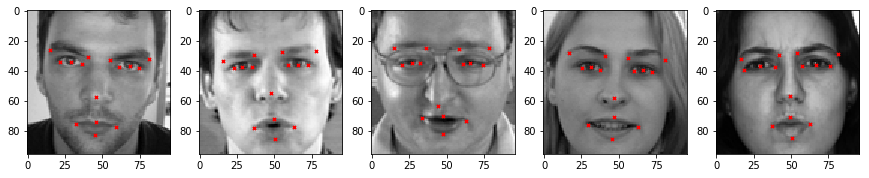

In [17]:
fig = plt.figure(figsize=(18, 18))

for i in range(1, 6):
    axis = fig.add_subplot(1, 6, i+1)
    plt_sample(i)
    #plt.scatter(y[i][0::2] * 48 + 48, y[i][1::2] * 48 + 48, marker='x', s=10, color='red')

plt.show()

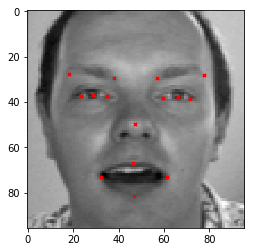

In [18]:
plt_sample(11)

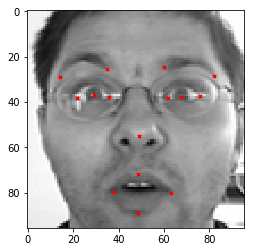

In [19]:
plt_sample(171)

In [21]:
from keras.models import Sequential
from keras.layers import BatchNormalization, Conv2D, Activation, MaxPooling2D, Dense, GlobalAveragePooling2D

Using TensorFlow backend.


In [ ]:
model = Sequential()
model.add(Dense(100, activation="relu", input_shape=(96*96,)))
model.add(Activation('relu'))
model.add(Dense(30))

In [22]:
model = Sequential()
model.add(Dense(100, activation="relu", input_shape=(96*96,)))
model.add(Activation('relu'))
model.add(Dense(30))

In [23]:
from keras import optimizers

sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])
epochs = 100
history = model.fit(X, y, 
                 validation_split=0.2, shuffle=True, 
                 epochs=epochs, batch_size=20)

Train on 1712 samples, validate on 428 samples
Epoch 1/100
1712/1712 [==============================] - 1s - loss: 0.0359 - acc: 0.5648 - val_loss: 0.0119 - val_acc: 0.6308
Epoch 2/100
1712/1712 [==============================] - 1s - loss: 0.0111 - acc: 0.6402 - val_loss: 0.0093 - val_acc: 0.6519
Epoch 3/100
1712/1712 [==============================] - 1s - loss: 0.0093 - acc: 0.6595 - val_loss: 0.0102 - val_acc: 0.6729
Epoch 4/100
1712/1712 [==============================] - 1s - loss: 0.0086 - acc: 0.6723 - val_loss: 0.0084 - val_acc: 0.6565
Epoch 5/100
1712/1712 [==============================] - 1s - loss: 0.0080 - acc: 0.6746 - val_loss: 0.0081 - val_acc: 0.6612
Epoch 6/100
1712/1712 [==============================] - 1s - loss: 0.0072 - acc: 0.6787 - val_loss: 0.0084 - val_acc: 0.6565
Epoch 7/100
1712/1712 [==============================] - 1s - loss: 0.0070 - acc: 0.6840 - val_loss: 0.0085 - val_acc: 0.6799
Epoch 8/100
1712/1712 [==============================] - 1s - loss: 0.0

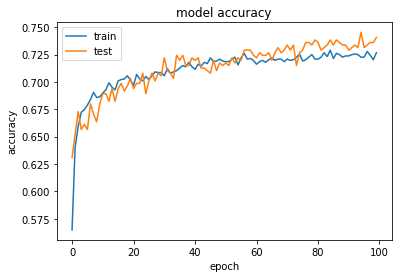

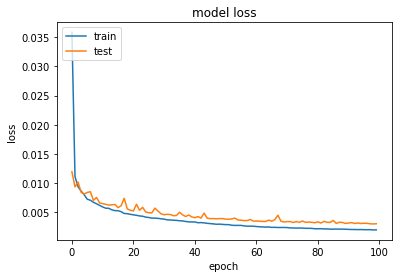

In [24]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

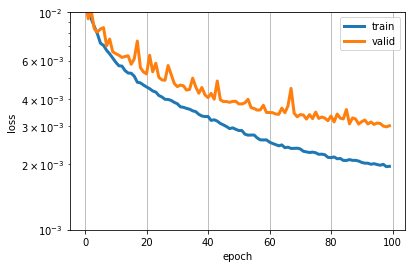

In [26]:
plt.plot(history.history['loss'], linewidth=3, label='train')
plt.plot(history.history['val_loss'], linewidth=3, label='valid')
plt.grid()
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.ylim(1e-3, 1e-2)
plt.yscale('log')
plt.show()

In [27]:
def plot_sample(x, y, axis):
    img = x.reshape(96, 96)
    axis.imshow(img, cmap='gray')
    axis.scatter(y[0::2] * 48 + 48, y[1::2] * 48 + 48, marker='x', s=10, color='yellow')

ImageId    1783
Image      1783
dtype: int64


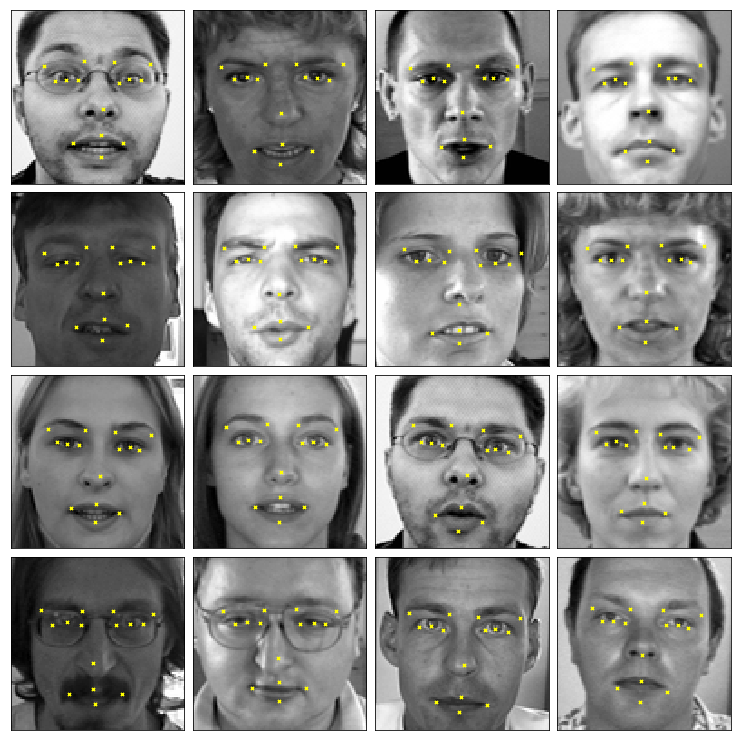

In [28]:
X_test, _ = load(test=True)
y_test = model.predict(X_test)

fig = plt.figure(figsize=(10, 10))
fig.subplots_adjust(
    left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(16):
    axis = fig.add_subplot(4, 4, i+1, xticks=[], yticks=[])
    plot_sample(X_test[i], y_test[i], axis)

plt.show()

In [ ]:
# Now try CNN & hope things don't bomb out

In [69]:
X.shape

(2140, 9216)

In [10]:
from keras.layers import Dropout, Flatten, MaxPooling2D

In [32]:
from keras import optimizers

In [17]:
model = Sequential()
# input layer
model.add(BatchNormalization(input_shape=(96, 96, 1))) #(input_shape=(96, 96, 1)
model.add(Conv2D(24, (3, 3), kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.2))
# layer 2
model.add(Conv2D(36, (5, 5)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.2))
# layer 3
model.add(Conv2D(48, (5, 5)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.2))
# layer 4
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.2))
# layer 5
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(Flatten())
# layer 6
model.add(Dense(500, activation="relu"))
# layer 7
model.add(Dense(90, activation="relu"))
# layer 8
model.add(Dense(30))

In [18]:
checkpointer = ModelCheckpoint(filepath='KPT_500-90-30.h5', verbose=1, save_best_only=True)

In [19]:
#sgd = optimizers.SGD(lr=0.1, decay=1e-6, momentum=0.95, nesterov=True)
model.compile(optimizer='rmsprop', metrics=['accuracy'], loss='mse')
epochs = 20
history = model.fit(X, y, 
                 validation_split=0.2, shuffle=True, 
                 epochs=epochs, batch_size=20, callbacks=[checkpointer], verbose=1)

Train on 1712 samples, validate on 428 samples
Epoch 1/20
1712/1712 [==============================] - 27s - loss: 537.4450 - acc: 0.5029 - val_loss: 493.8598 - val_acc: 0.7079
Epoch 2/20
1712/1712 [==============================] - 26s - loss: 273.1663 - acc: 0.6595 - val_loss: 625.4415 - val_acc: 0.7079
Epoch 3/20
1712/1712 [==============================] - 26s - loss: 216.4485 - acc: 0.6863 - val_loss: 94.2777 - val_acc: 0.7079
Epoch 4/20
1712/1712 [==============================] - 26s - loss: 193.1765 - acc: 0.6887 - val_loss: 562.2249 - val_acc: 0.7079
Epoch 5/20
1712/1712 [==============================] - 26s - loss: 165.6224 - acc: 0.7004 - val_loss: 149.1198 - val_acc: 0.7079
Epoch 6/20
1712/1712 [==============================] - 26s - loss: 142.9469 - acc: 0.6992 - val_loss: 197.3642 - val_acc: 0.7079
Epoch 7/20
1712/1712 [==============================] - 26s - loss: 145.1412 - acc: 0.7033 - val_loss: 99.2594 - val_acc: 0.7079
Epoch 8/20
1712/1712 [=======================

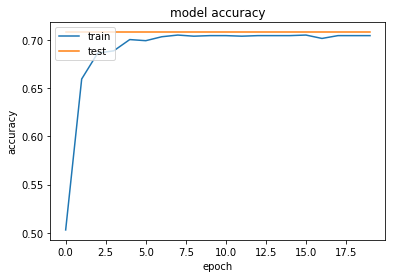

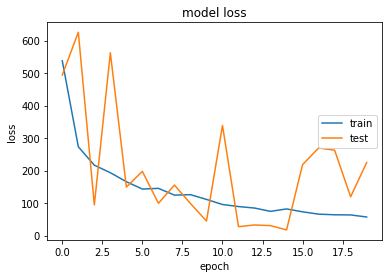

In [21]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='center right')
plt.show()

In [27]:
from keras.layers import Convolution2D

In [28]:
# slightly modified version of above

In [43]:
model = Sequential()

model.add(BatchNormalization(input_shape=(96, 96, 1)))

model.add(Conv2D(24, (5, 5), padding='same', kernel_initializer='he_normal', input_shape=(96, 96, 1)))#, dim_ordering='tf'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

model.add(Conv2D(36, (5, 5), activation='relu'))
#model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

model.add(Conv2D(48, (5, 5), activation='relu'))
#model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))

model.add(GlobalAveragePooling2D());

model.add(Dense(500, activation='relu'))
model.add(Dense(90, activation='relu'))
model.add(Dense(30))

In [45]:
model.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath='CNN_500-90-30_v2.h5', verbose=1, save_best_only=True)
epochs = 20
hist = model.fit(X, y, validation_split=0.2, shuffle=True, epochs=epochs, 
                 batch_size=20, callbacks=[checkpointer], verbose=1)

Train on 1712 samples, validate on 428 samples
Epoch 1/20
1712/1712 [==============================] - 31s - loss: 468.6881 - acc: 0.5263 - val_loss: 949.3250 - val_acc: 0.7079
Epoch 2/20
1712/1712 [==============================] - 30s - loss: 252.7683 - acc: 0.6992 - val_loss: 220.4335 - val_acc: 0.7079
Epoch 3/20
1712/1712 [==============================] - 29s - loss: 189.1527 - acc: 0.6963 - val_loss: 127.6307 - val_acc: 0.7079
Epoch 4/20
1712/1712 [==============================] - 29s - loss: 172.5058 - acc: 0.7044 - val_loss: 76.0559 - val_acc: 0.7079
Epoch 5/20
1712/1712 [==============================] - 29s - loss: 138.1557 - acc: 0.7033 - val_loss: 67.7502 - val_acc: 0.7079
Epoch 6/20
1712/1712 [==============================] - 29s - loss: 121.9310 - acc: 0.6974 - val_loss: 217.6281 - val_acc: 0.6939
Epoch 7/20
1712/1712 [==============================] - 29s - loss: 120.3790 - acc: 0.6968 - val_loss: 67.2761 - val_acc: 0.7033
Epoch 8/20
1712/1712 [========================